# Pinksy-Rinzel One Compartment Model #
Simulate the one compartment version of the Pinksy-Rinzel model.

Matthias Heinkenschloss, Dept. of Computational Applied Mathematics and Operations Research, Rice University.
October 25, 2022.

References
-  Pinsky, P.~F. and Rinzel, J. (1994).
   Intrinsic and network rhythmogenesis in a reduced Traub model for CA3 neurons.
   {\em Journal of Computational Neuroscience}, 1(1):39--60, 
   https://doi.org/10.1007/BF00962717 .
-  Pinsky, P.~F. and Rinzel, J. (1995).
    Erratum: Intrinsic and network rhythmogenesis in a reduced Traub model for CA3 neurons.
    {\em Journal of Computational Neuroscience}, 2(3):275--275, 
    https://doi.org/10.1007/BF00961439 .

  


In [1]:
import numpy as np
import scipy.io as spio
from scipy.integrate import solve_ivp
##%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
rcParams['font.size'] = 24
rc('font', family='sans-serif')
rcParams['font.family'] = 'Serif'
rcParams['font.weight'] = 'light'
rcParams['mathtext.fontset'] = 'cm'
rcParams['text.usetex'] = True
#import random

In [2]:
# Pinsky-Rinzel Model
#constants
Cm = 3.0    # Membrane Capcitance uF/cm^2
#dt = 0.05   # Time Step ms
p = 0.5     # Fraction of cable length assigned to soma (1-p for dendtrite)
Is = 0.25   # External Current Applied #can be -0.5 for simpler model
VNa = 120.0 # mv Na reversal potential
VK = -15.0  # mv K reversal potential
VL = 0.0    # mv Leakage reversal potential

gNa = 30.0  # mS/cm^2 Na max conductance 
gKDR = 15.0 # mS/cm^2 K max conductance 
gL = 0.1    # mS/cm^2 Leakage max conductance 


#Funcions
#forward rate constant for fast sodium
def am(Vs):
    return 0.32*(13.1-Vs)/(np.exp((13.1-Vs)/4.0)-1.0)

#backward rate constant for fast sodium
def bm(Vs):
    return 0.28*(Vs-40.1)/(np.exp((Vs-40.1)/5.0)-1.0)

#forward rate constant for DR activation
def an(Vs):
    return 0.016*(35.1-Vs)/(np.exp((35.1-Vs)/5.0)-1.0)

#backward rate constant for DR activation
def bn(Vs):
    return 0.25*np.exp(0.5-0.025*Vs)

#forward rate constant for sodium inactivation
def ah(Vs):
    return 0.128*np.exp((17.0-Vs)/18.0)

#backward rate constant for sodium inactivation
def bh(Vs):
    return 4.0/(1+np.exp((40.0-Vs)/5.0))

#somatic leak current
def Ils(Vs,h,n):
    return gL*(Vs-VL)

#steady-state sodium activation (instantaneous)
def minf(Vs):
    return am(Vs)/(am(Vs)+bm(Vs))

#sodium current (y(2) is h, inactivation of sodium current)
def INa(Vs,h,n):
    return gNa*(minf(Vs)**2)*h*(Vs-VNa)

#delayed rectifier current (y(3) is n, activation of DR)
def IKDR(Vs,h,n):
    return gKDR*n*(Vs-VK)

#Pinsky-Rinzel ODE
def PR1(t, y):
    Vs, h, n = y
    dVsdt = (-Ils(Vs,h,n) - INa(Vs,h,n) - IKDR(Vs,h,n) + Is/p)/Cm
    dhdt =  ah(Vs)*(1-h)-bh(Vs)*h
    dndt = an(Vs)*(1-n)-bn(Vs)*n
    return [ dVsdt, dhdt, dndt ]

# initial values
Vs0 = -4.6
h0 = 0.001
n0 = 0.999



In [3]:
# Solve the Pinski-Rinzel one compartment model
# 200 ms time
t_span = [0, 200]
sol = solve_ivp(PR1, t_span, [Vs0, h0, n0])

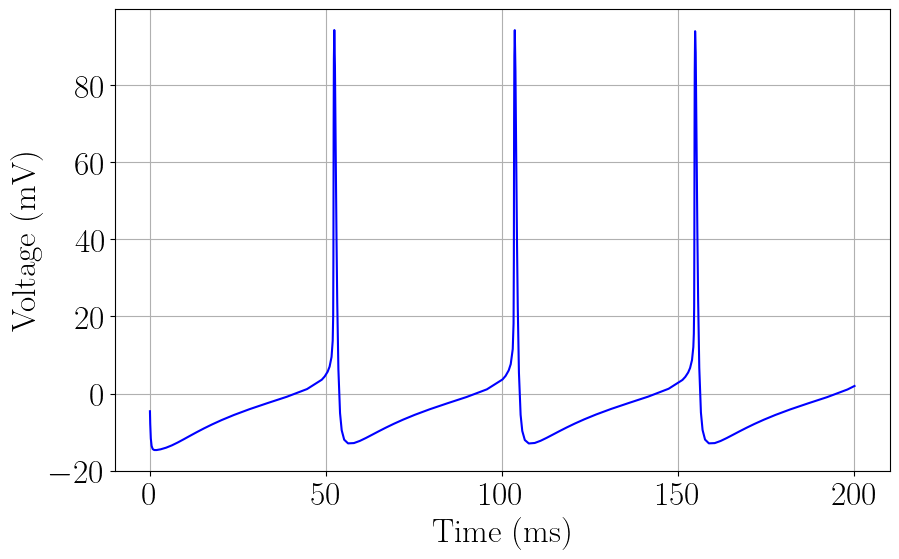

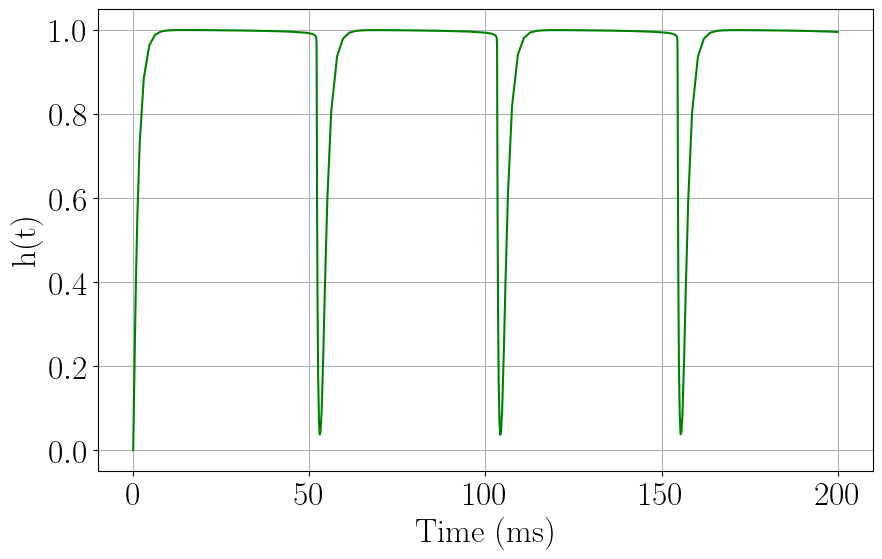

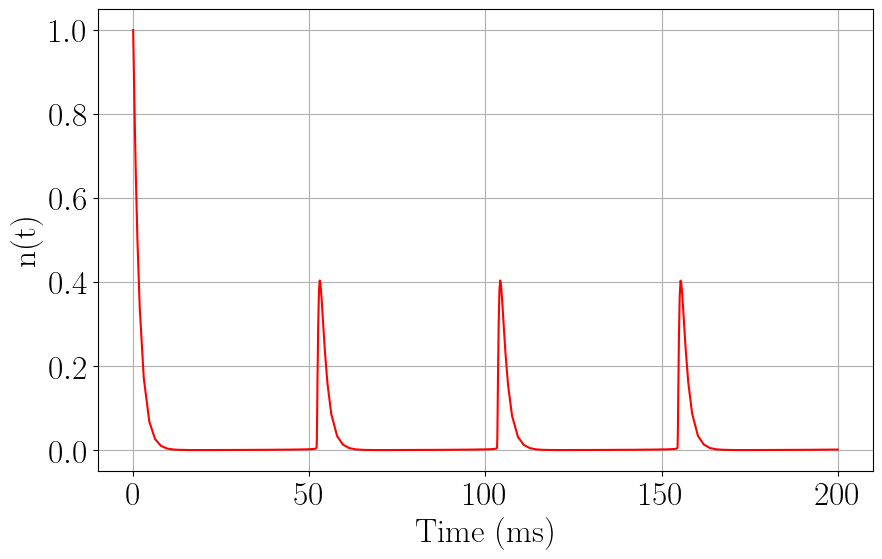

In [4]:
# Plot solution
fig1 = plt.figure(figsize=(10,6))
#plt.subplot(1,3,1)
plt.plot(sol.t, sol.y[0, :], 'b', label='Vs(t)')
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (ms)')
plt.grid()
#plt.subplot(1,3,2)
fig2 = plt.figure(figsize=(10,6))
plt.plot(sol.t, sol.y[1, :], 'g', label='h(t)')
plt.ylabel('h(t)')
plt.xlabel('Time (ms)')
plt.grid()
#plt.subplot(1,3,3)
fig3 = plt.figure(figsize=(10,6))
plt.plot(sol.t, sol.y[2, :], 'r', label='n(t)')
plt.ylabel('n(t)')
plt.xlabel('Time (ms)')
#plt.legend(loc='best')
plt.grid()
plt.show()